In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy.stats import norm

## 고객 구매데이터를 통해 통계적 의미의 인사이트 도출
- Task1. 1차 생성된 데이터셋을 통계적 탐색 방법을 통하여 특성을 파악한 후 추가적인 인사이트를 적절하게 반영하세요. 입력
  - 결측치 추가, 이상치 처리, 정규분포로 데이터셋 수정
  
- (예시)Task2. 고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행하세요.
  - 이 경우 거래 기준 데이터를 고객 기준 데이터로 변환 필요
  - 고객 데이터 기준의 인사이트 출력


통계적 분석 기법을 이용하여 첨부한 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정해서 df_pur로 만드는 과정
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정

In [2]:
# 고객들의 상품 구매 데이터셋 불러오기
df = pd.pandas.read_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/pur_data1.csv')

# 전반적인 데이터셋 확인
#df.head()
df.info()

# 성비, 나이, 지역 분포 확인
#df['gender'].value_counts() # 1은 여자 0은 남자
#df['age_group'].value_counts()
#df['region'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cusno        10000 non-null  int64  
 1   gender       10000 non-null  int64  
 2   age          10000 non-null  int64  
 3   region       10000 non-null  int64  
 4   trans_id     10000 non-null  int64  
 5   date         10000 non-null  object 
 6   day          10000 non-null  object 
 7   product_20   10000 non-null  int64  
 8   product_21   10000 non-null  int64  
 9   price_20     10000 non-null  float64
 10  price_21     10000 non-null  float64
 11  quantity_20  10000 non-null  float64
 12  quantity_21  10000 non-null  float64
 13  time_20      10000 non-null  int64  
 14  time_21      10000 non-null  int64  
 15  amount_20    10000 non-null  float64
 16  amount_21    10000 non-null  float64
 17  year         10000 non-null  int64  
 18  month        10000 non-null  int64  
 19  quart

<function matplotlib.pyplot.show(close=None, block=None)>

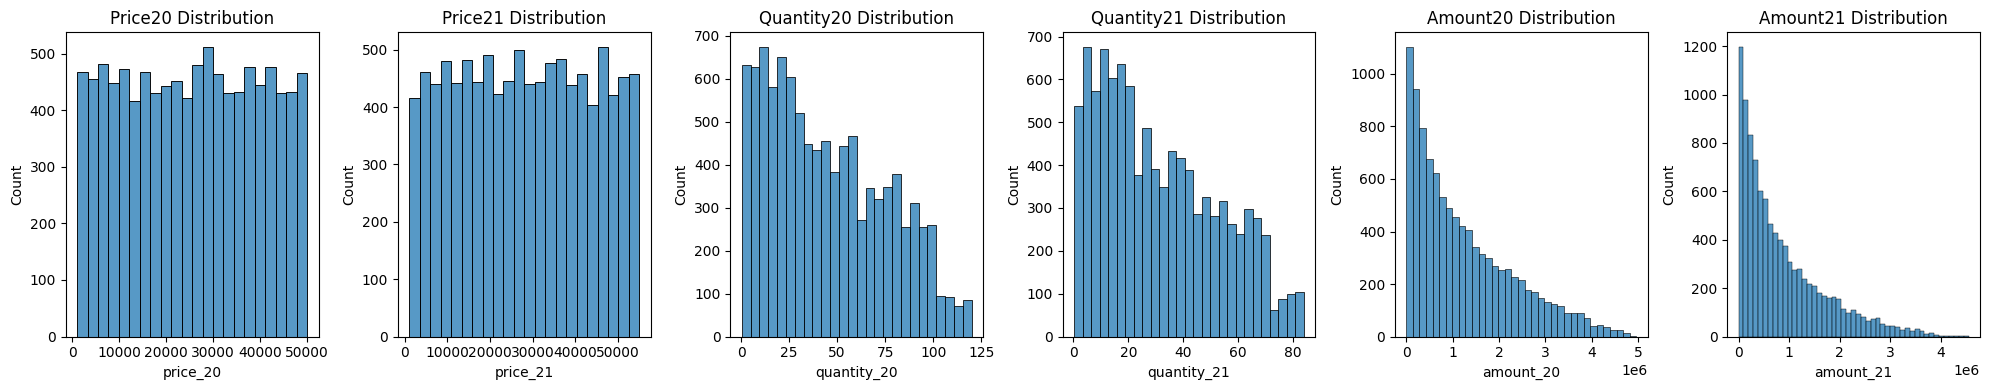

In [71]:
# 연도별 가격, 구매 수량, 구매 금액 분포 시각화
fig, axes = plt.subplots(1,6,figsize=(20,4))
sns.histplot(df['price_20'],ax=axes[0])
axes[0].set_title('Price20 Distribution')

sns.histplot(df['price_21'],ax=axes[1])
axes[1].set_title('Price21 Distribution')

sns.histplot(df['quantity_20'],ax=axes[2])
axes[2].set_title('Quantity20 Distribution')

sns.histplot(df['quantity_21'],ax=axes[3])
axes[3].set_title('Quantity21 Distribution')

sns.histplot(df['amount_20'],ax=axes[4])
axes[4].set_title('Amount20 Distribution')

sns.histplot(df['amount_21'],ax=axes[5])
axes[5].set_title('Amount21 Distribution')
plt.tight_layout()
plt.show

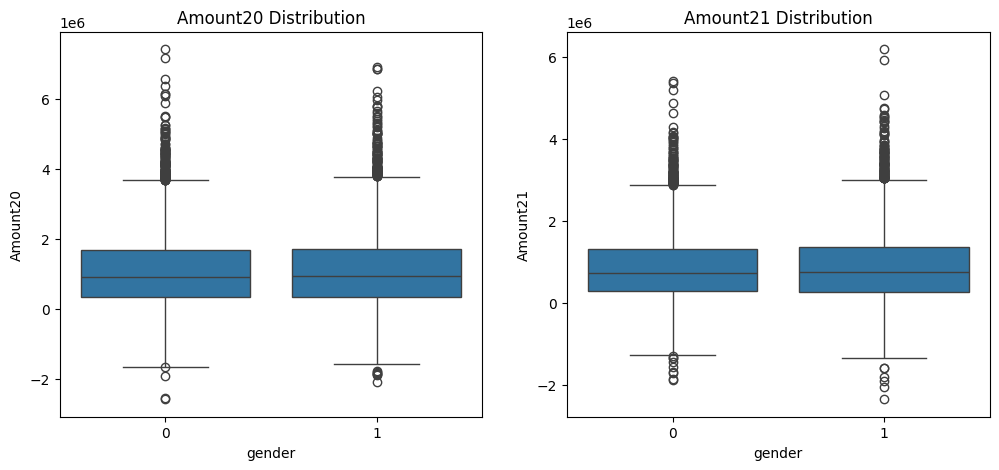

In [48]:
# 성별에 따른 구매 금액의 분포 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='amount_20', data=df)
plt.ylabel('Amount20')
plt.title('Amount20 Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='amount_21', data=df)
plt.ylabel('Amount21')
plt.title('Amount21 Distribution')
plt.show()

In [3]:
# 연도별 가격, 구매 수량, 구매 금액(매출)을 정규분포에 근사하도록 수정

np.random.seed(0)

# price_20, price_21을 정규분포로 변환
df['price_20'] = np.random.normal(df['price_20'].mean(), df['price_20'].std(), len(df))
df['price_21'] = np.random.normal(df['price_21'].mean(), df['price_21'].std(), len(df))

# quantity_20, quantity_21을 정규분포로 변환
df['quantity_20'] = np.random.normal(df['quantity_20'].mean(), df['quantity_20'].std(), len(df))
df['quantity_21'] = np.random.normal(df['quantity_21'].mean(), df['quantity_21'].std(), len(df))

# 변환된 값 amount20, amount_21에 적용
df['amount_20'] = df['price_20'] * df['quantity_20']
df['amount_21'] = df['price_21'] * df['quantity_21']

In [4]:
# price_20에 결측치 추가
df.loc[df['price_20'].sample(n=10, random_state=0).index, 'price_20'] = np.nan

# 결측치 확인
# 데이터 값이 null인 데이터만 출력
null_data = df[df.isnull().any(axis=1)]

In [ ]:
df.isnull().sum()

TypeError: boxplot() got an unexpected keyword argument 'ax'

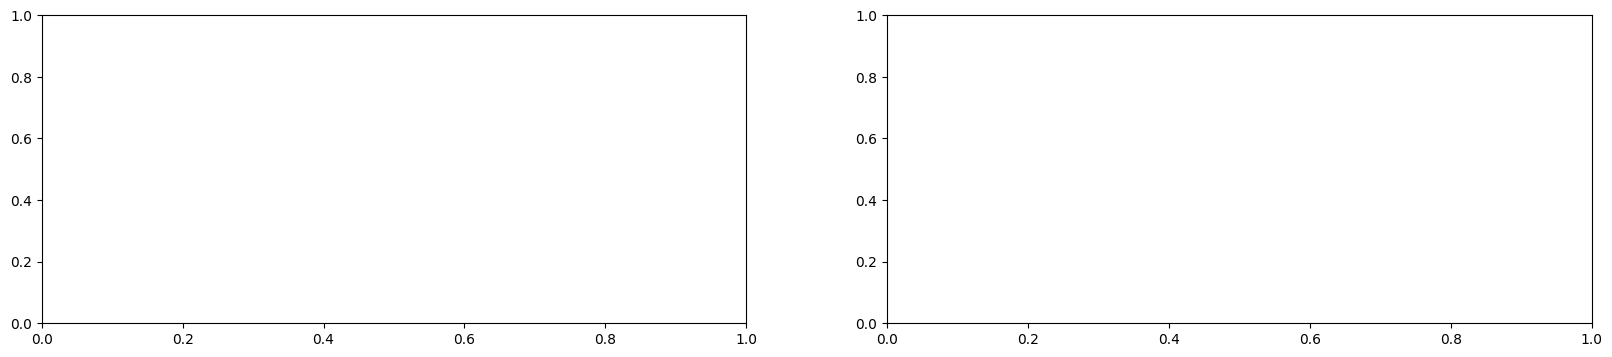

In [12]:
# price_20과 price_21의 boxplot 그리기
fig, axes = plt.subplots(1,2,figsize=(20,4))

plt.boxplot(df['price_20'], ax=axes[0])
axes[0].set_ylabel('Price20')
axes[0].set_title('Price20 Distribution')

plt.boxplot(df['price_21'], ax=axes[1])
axes[0].set_ylabel('Price21')
axes[0].set_title('Price21 Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

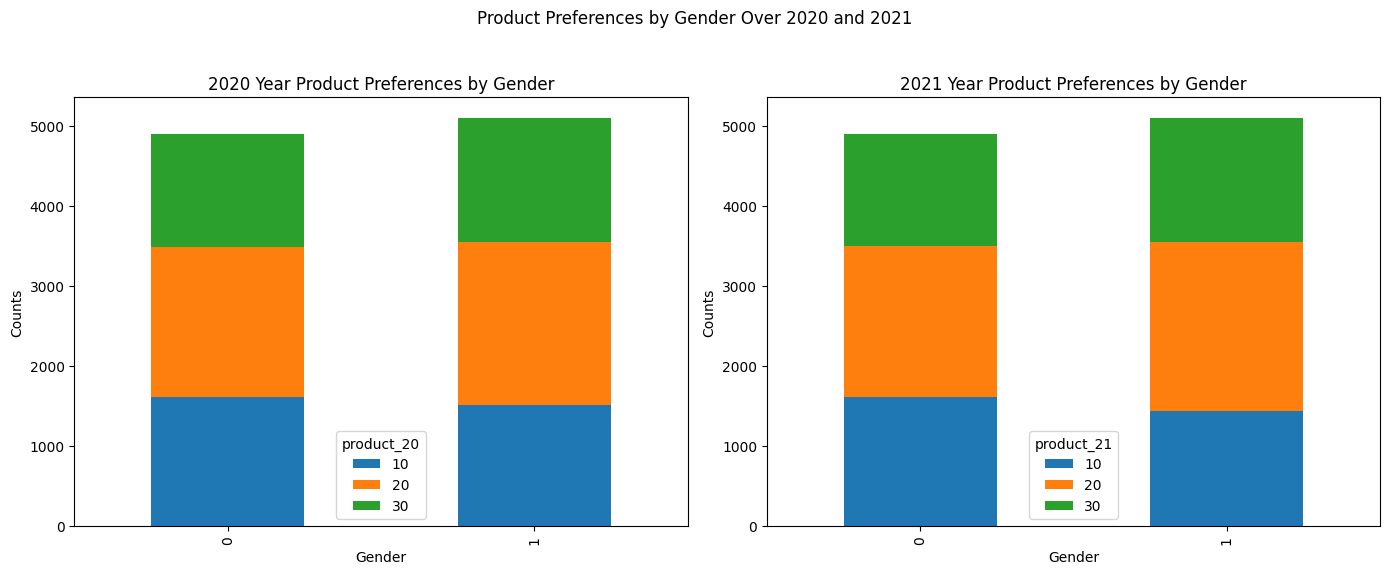

In [11]:
# 남녀별 20년도, 21년도 선호 product 시각화

df_product20 = df.groupby(['gender', 'product_20']).size().unstack()
df_product21 = df.groupby(['gender', 'product_21']).size().unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 2020년 데이터 그래프
df_product20.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('2020 Year Product Preferences by Gender')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('Gender')

# 2021년 데이터 그래프
df_product21.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('2021 Year Product Preferences by Gender')
axes[1].set_ylabel('Counts')
axes[1].set_xlabel('Gender')

# 전체 그래프 타이틀 및 보여주기 설정
plt.suptitle('Product Preferences by Gender Over 2020 and 2021')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Axes: xlabel='age_group'>

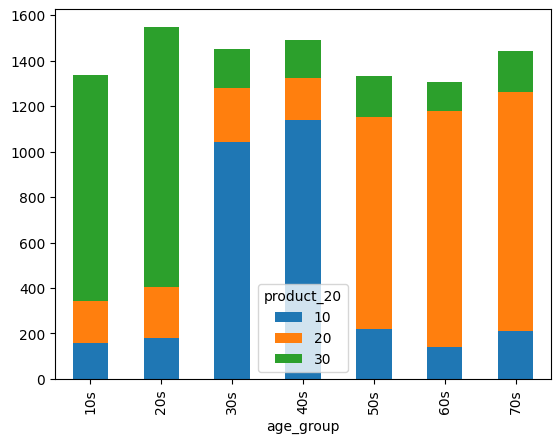

In [8]:
# 연령별 20년도, 21년도 선호 product 시각화
df_age = df.groupby(['age_group', 'product_20']).size().unstack()
df_age.plot(kind='bar', stacked=True)

In [75]:
df.to_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/pur_data2.csv', index=False)

  
- (예시)Task2. 고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행하세요.
  - 이 경우 거래 기준 데이터를 고객 기준 데이터로 변환 필요
  - 고객 데이터 기준의 인사이트 출력